#Importing the libraries

In [ ]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

file_veg="veg_menu_nov.csv"
file_path_veg = f"/content/drive/My Drive/dv_dataset/{file_veg}"


file_nonveg="nonveg_menu_nov.csv"
file_path_nonveg = f"/content/drive/My Drive/dv_dataset/{file_nonveg}"




#Loading the dataset for VEG MENU

In [ ]:
menu = pd.read_csv(file_path_veg)
menu.head()

,Category,item,sodium(mg),carbohydrates(g),protein(g),iron(mg),calcium(mg)
0,breakfast,poori,2.2,7.5,1.3,0.50,5.2
1,breakfast,black channa,64.0,57.8,22.4,4.31,57.0
2,breakfast,idly,1.1,7.2,1.0,0.20,4.0
3,breakfast,vada,8.4,12.5,5.0,0.80,32.3
4,breakfast,sambhar,10.7,18.4,5.2,0.90,37.3


#Shape of the dataset

In [ ]:
menu.shape

(68, 7)

In [ ]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          68 non-null     object 
 1   item              68 non-null     object 
 2   sodium(mg)        68 non-null     float64
 3   carbohydrates(g)  68 non-null     float64
 4   protein(g)        68 non-null     float64
 5   iron(mg)          68 non-null     float64
 6   calcium(mg)       68 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.8+ KB


In [ ]:
menu.isnull().sum()

Category            0
item                0
sodium(mg)          0
carbohydrates(g)    0
protein(g)          0
iron(mg)            0
calcium(mg)         0
dtype: int64

Analysis:


1.  The dataset has 67 records (menu items)
2.  5 out of 7 attributes have the datatype float64
3.  2 out of 7 attributes have the object datatype
4.  Total memory usage of the dataset = 3.8+ KB




#Effective Data Analysis

In [ ]:
#Gives the entire summary of the dataset
menu.describe()

,sodium(mg),carbohydrates(g),protein(g),iron(mg),calcium(mg)
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,115.229265,24.185147,6.361912,1.642500,71.062794
std,530.070356,15.810648,5.872284,1.835778,97.387266
min,0.600000,1.000000,0.400000,0.000000,0.540000
25%,6.075000,12.500000,2.875000,0.600000,20.975000
50%,11.850000,23.000000,5.000000,1.100000,39.680000
75%,39.000000,32.100000,8.400000,2.000000,63.400000
max,4333.000000,68.510000,38.900000,8.900000,512.700000


#Unique values in Category Column

In [ ]:
unique_menu_categories = menu['Category'].unique()
print(unique_menu_categories)


['breakfast' 'lunch' 'dinner']


In [ ]:
category_counts = menu['Category'].value_counts()
print(category_counts)


lunch        27
breakfast    23
dinner       18
Name: Category, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'breakfast'), Text(1, 0, 'lunch'), Text(2, 0, 'dinner')])

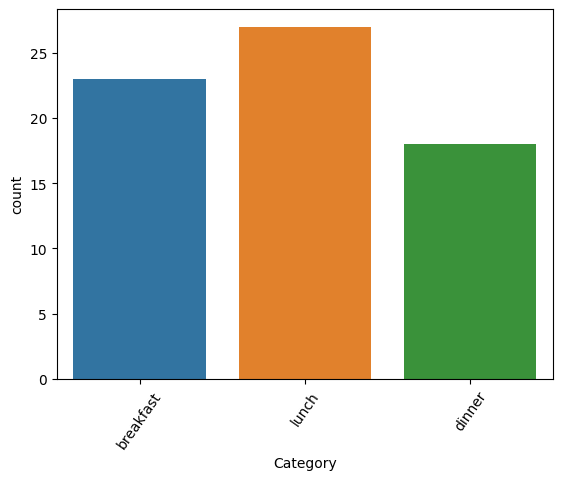

In [ ]:
sns.countplot(x='Category', data=menu)
plt.xticks(rotation=55)

Analysis:

1.  The different types of menus are - breakfast(23 items), lunch(27 items),dinner (18 items)


#Visualize Average Nutritions Value per Category

In [ ]:
# Make a lis of all nutritions which u want to visualize
nutritions = ['protein(g)', 'carbohydrates(g)',
              'sodium(mg)', 'iron(mg)', 'calcium(mg)']


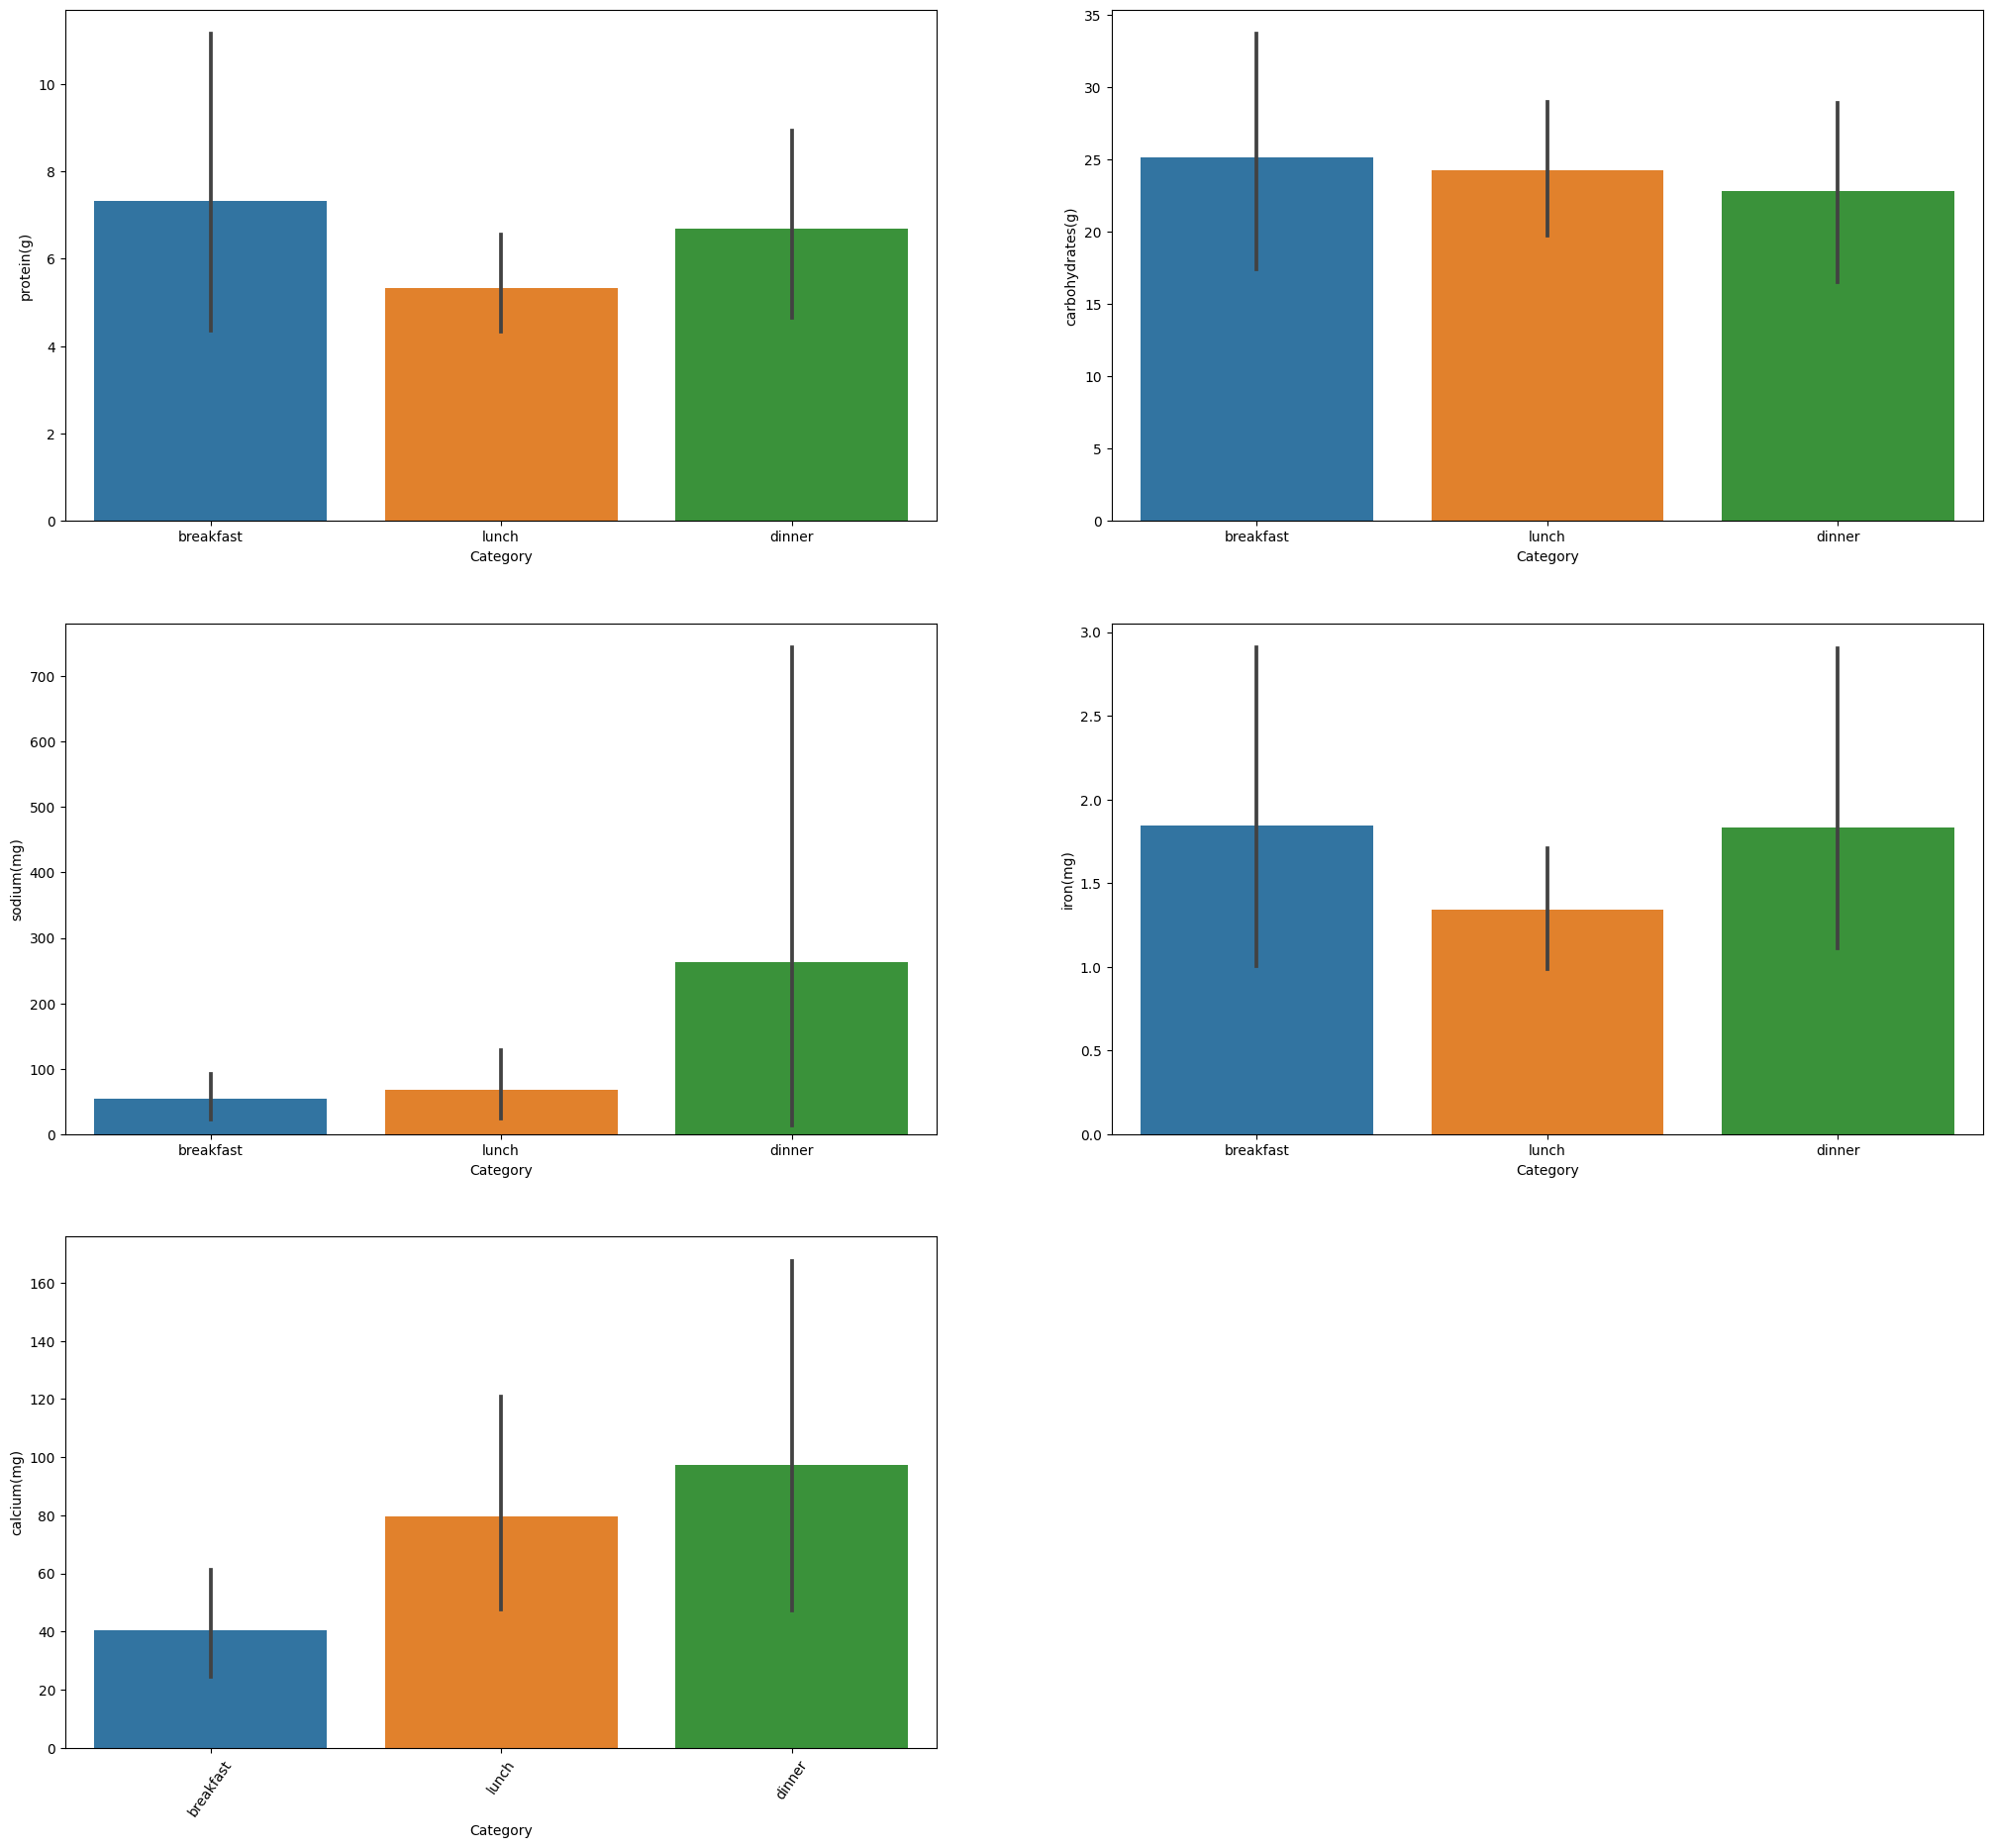

In [ ]:
plt.figure(figsize = (25,55))
for i, ntr in enumerate(nutritions):
    plt.subplot(7, 2, i+1)
    sns.barplot(x='Category', y=ntr, data=menu)
plt.xticks(rotation=55)
plt.show()

In [ ]:
# Texual Description about above visualization
for ntr in nutritions:
    temp_list = menu.pivot_table(ntr, 'Category').sort_values(by=ntr, ascending=False)
    print('{}'.format(temp_list[:7]))
    print('-----------------------------------------------------')

           protein(g)
Category             
breakfast    7.321739
dinner       6.678333
lunch        5.333333
-----------------------------------------------------
           carbohydrates(g)
Category                   
breakfast         25.178696
lunch             24.248148
dinner            22.821111
-----------------------------------------------------
           sodium(mg)
Category             
dinner     263.347778
lunch       68.577778
breakfast   54.075217
-----------------------------------------------------
           iron(mg)
Category           
breakfast  1.846957
dinner     1.833889
lunch      1.340741
-----------------------------------------------------
           calcium(mg)
Category              
dinner       97.230556
lunch        79.607407
breakfast    40.553043
-----------------------------------------------------


Analysis:

1. The above code cell prints top 3 categorical source for each nutrition listed
2. Also by onserving graphs we can get rich source of each nutrition

#Plot Average Carbohydrates each Category contains

(array([0, 1, 2]),
 [Text(0, 0, 'breakfast'), Text(1, 0, 'lunch'), Text(2, 0, 'dinner')])

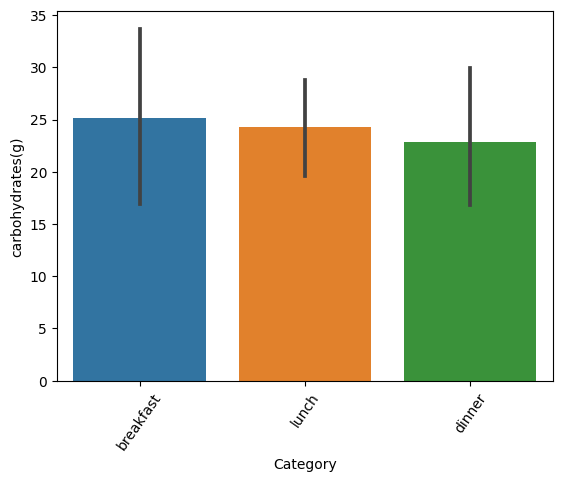

In [ ]:
sns.barplot(x='Category', y='carbohydrates(g)', data=menu)
plt.xticks(rotation=55)

Analysis:

1.  The above graph shows the carbohydrates that each type of menu has on an average.

*   breakfast - around 25g
*   lunch - around 24g
*   dinner - around 23g



#Plot which items contains which nutritions

In [ ]:
# A function which can plot N Items which contains highest nutrition
# Change value of N as per convenience in visualization

def plot_item_vs_nutrition(menu, nutrition, n):
    top_n_items = menu.groupby('item')[nutrition].sum().nlargest(n)


   # Print maximum and minimum values along with corresponding item names
    max_item = top_n_items.idxmax()
    min_item = top_n_items.idxmin()
    max_value = top_n_items.max()
    min_value = top_n_items.min()

    print(f"Item with Maximum {nutrition}: {max_item} ({max_value})")
    print(f"Item with Minimum {nutrition}: {min_item} ({min_value})")

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_n_items.values, y=top_n_items.index, orient='h')
    plt.xlabel(nutrition)
    plt.ylabel('Menu Item')
    plt.title(f'Top {n} Items based on {nutrition}')
    plt.show()

Item with Maximum protein(g): masala dosai (38.9)
Item with Minimum protein(g): coconut chutney (0.4)


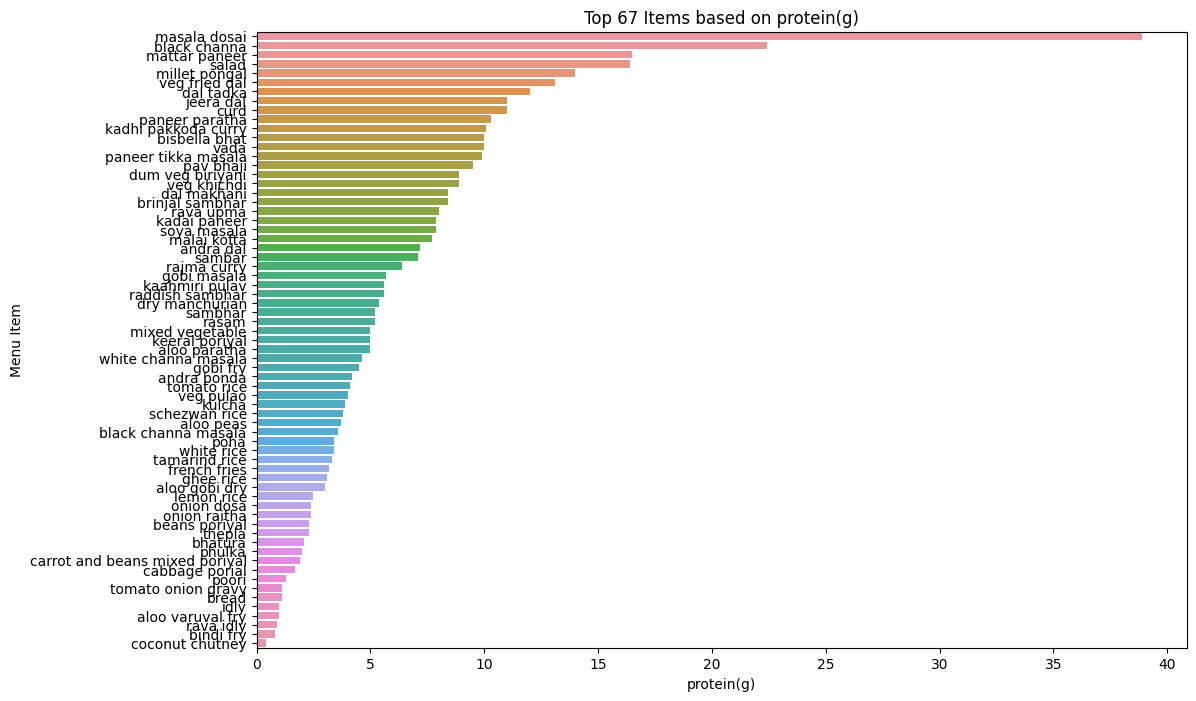

In [ ]:
# Let's Start with protein
plot_item_vs_nutrition(menu,'protein(g)', len(menu) - 1)

Item with Maximum carbohydrates(g): millet pongal (68.51)
Item with Minimum carbohydrates(g): coconut chutney (1.0)


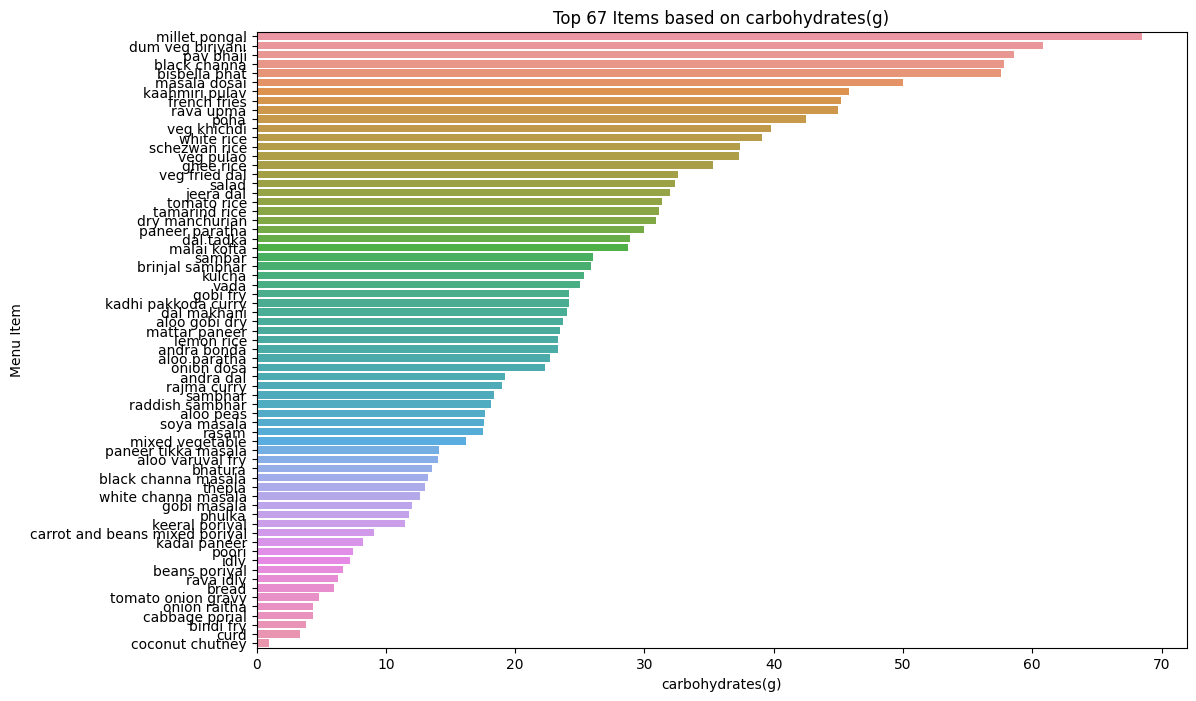

In [ ]:
plot_item_vs_nutrition(menu,'carbohydrates(g)', len(menu) - 1)

Item with Maximum sodium(mg): salad (4333.0)
Item with Minimum sodium(mg): ghee rice (0.6)


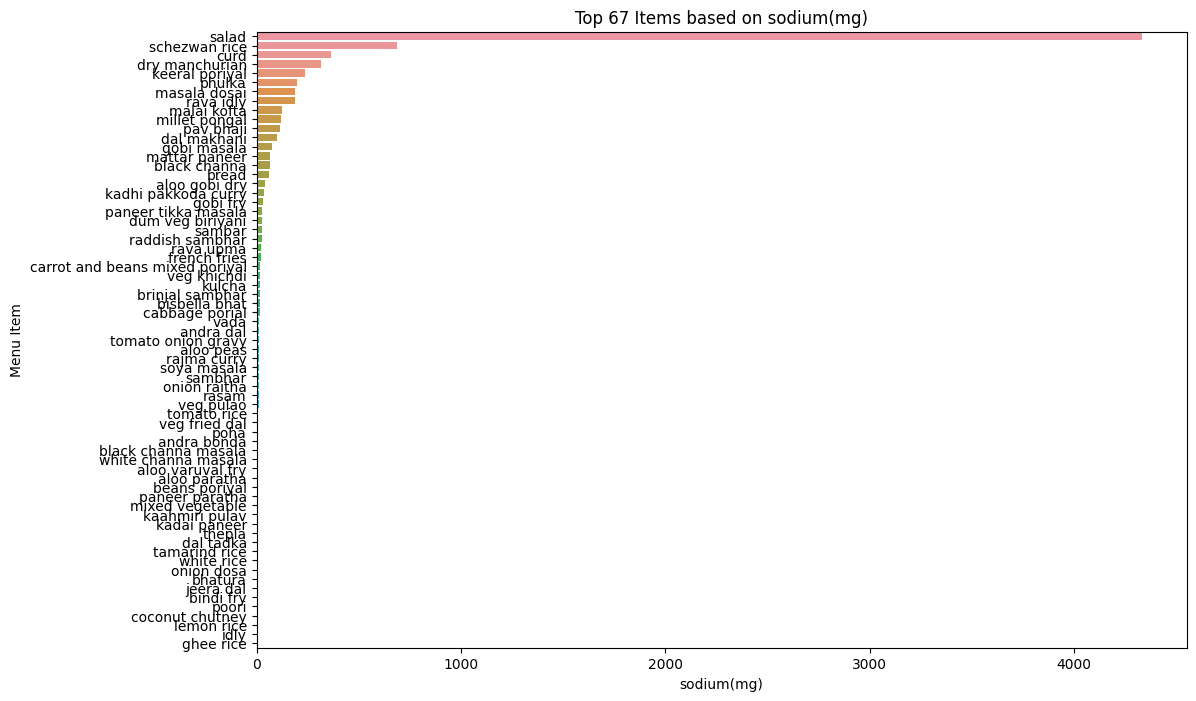

In [ ]:
plot_item_vs_nutrition(menu,'sodium(mg)', len(menu) - 1)

Item with Maximum iron(mg): veg khichdi (8.9)
Item with Minimum iron(mg): curd (0.0)


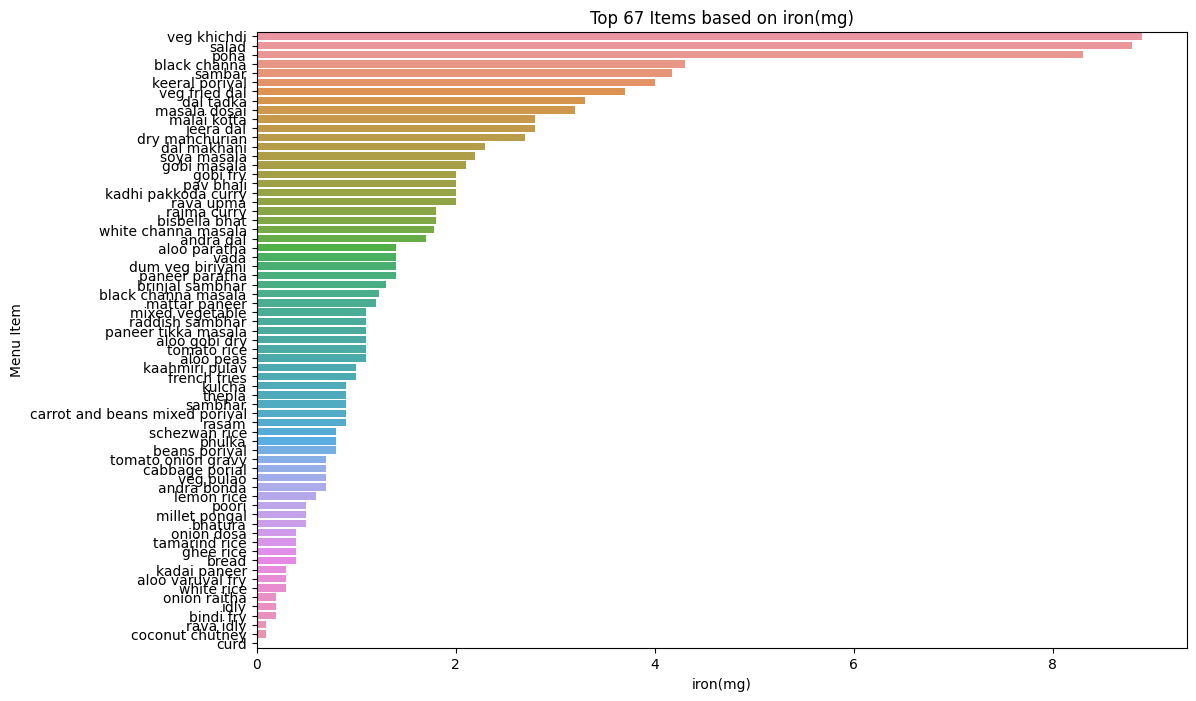

In [ ]:
plot_item_vs_nutrition(menu,'iron(mg)', len(menu) - 1)

Item with Maximum calcium(mg): mattar paneer (512.7)
Item with Minimum calcium(mg): millet pongal (0.54)


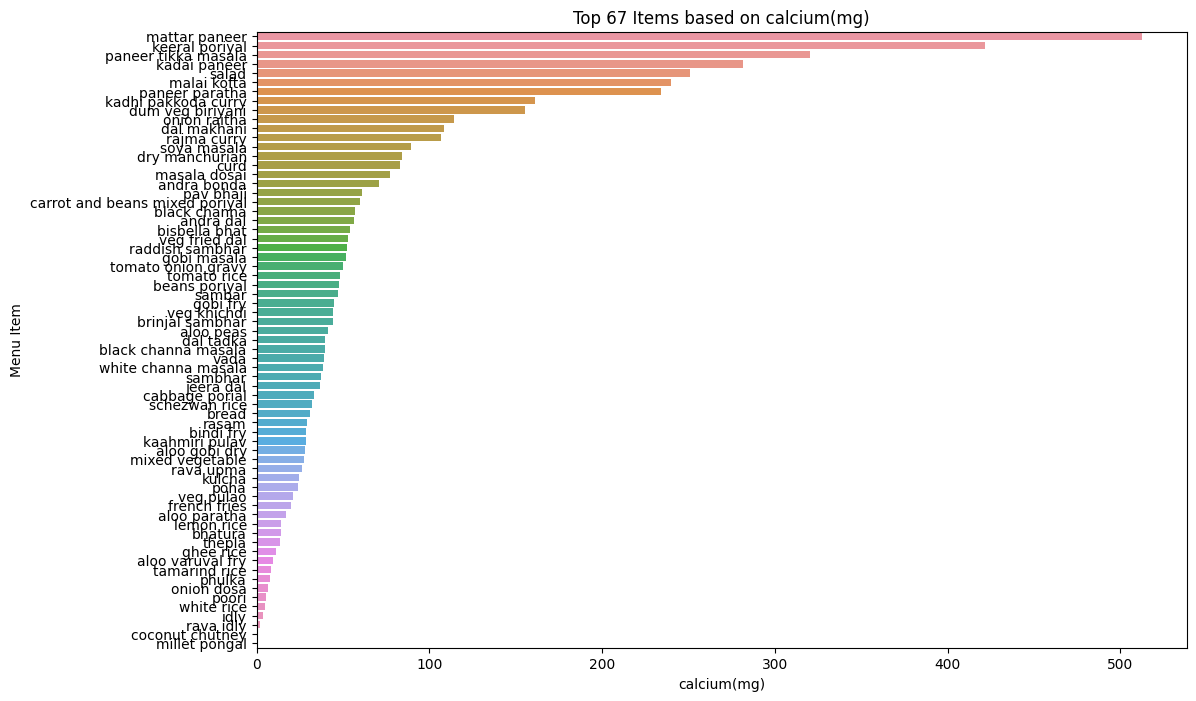

In [ ]:
plot_item_vs_nutrition(menu,'calcium(mg)', len(menu) - 1)